<a href="https://colab.research.google.com/github/edx04/data-science/blob/main/ideaArellanoBivariado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

     \ 25.9 MB 2.3 MB/s
     |████████████████████████████████| 10.9 MB 10.3 MB/s 
     |████████████████████████████████| 596 kB 56.7 MB/s 
     |████████████████████████████████| 102 kB 12.2 MB/s 
     |████████████████████████████████| 63 kB 1.2 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261287 sha256=0226c55c3178ea519411c915249c0834fa506f71be2d15e5ce8968089589fa31
  Stored in directory: /tmp/pip-ephem-wheel-cache-20gv_4f8/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
Successfully built pandas-profiling
  Attempting uninstall: visions
    Found existing installation: visions 0.4.1
    Uninstalling visions-0.4.1:
      Successfully uninstalled visions-0.4.1
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstall

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/edx04/data-science/main/data/Employee.csv')
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [3]:
data.shape

(4653, 9)

In [4]:
data.count()


Education                    4653
JoiningYear                  4653
City                         4653
PaymentTier                  4653
Age                          4653
Gender                       4653
EverBenched                  4653
ExperienceInCurrentDomain    4653
LeaveOrNot                   4653
dtype: int64

In [5]:
data.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

In [6]:
type(data)


pandas.core.frame.DataFrame

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
JoiningYear,4653.0,2015.062970,1.863377,2012.0,2013.0,2015.0,2017.0,2018.0
PaymentTier,4653.0,2.698259,0.561435,1.0,3.0,3.0,3.0,3.0
Age,4653.0,29.393295,4.826087,22.0,26.0,28.0,32.0,41.0
ExperienceInCurrentDomain,4653.0,2.905652,1.558240,0.0,2.0,3.0,4.0,7.0
LeaveOrNot,4653.0,0.343864,0.475047,0.0,0.0,0.0,1.0,1.0


In [12]:
profile = pandas_profiling.ProfileReport(data,title='Empleados', html={'style':{'full_width':True}})
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

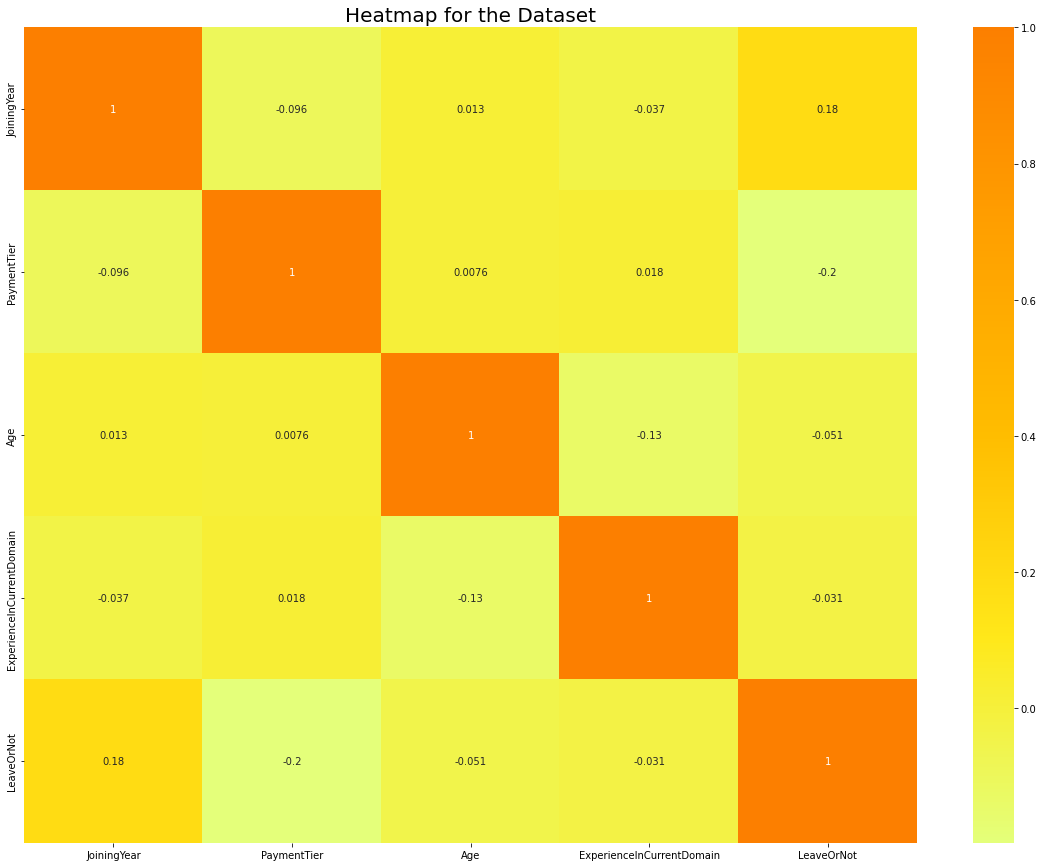

In [13]:
plt.rcParams['figure.figsize'] = (20, 15)

sns.heatmap(data.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()


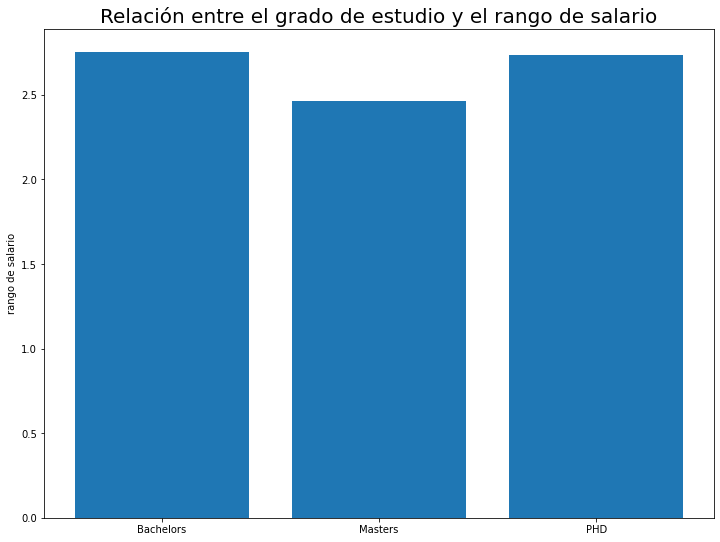

In [29]:
result = data.groupby('Education').mean()
plt.rcParams['figure.figsize'] = (12, 9)
plt.bar(result.index, result['PaymentTier'])
plt.title('Relación entre el grado de estudio y el rango de salario', fontsize = 20)
plt.ylabel('rango de salario')
plt.show()


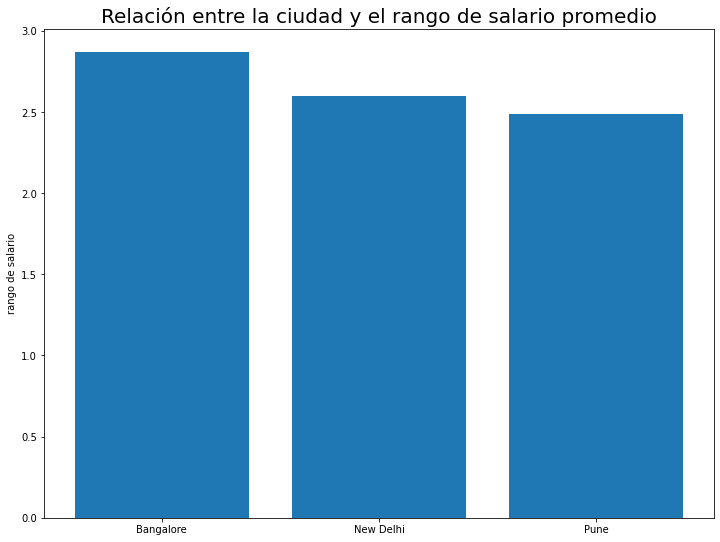

In [31]:
result = data.groupby('City').mean()
plt.rcParams['figure.figsize'] = (12, 9)
plt.bar(result.index, result['PaymentTier'])
plt.title('Relación entre la ciudad y el rango de salario promedio', fontsize = 20)
plt.ylabel('rango de salario')
plt.show()

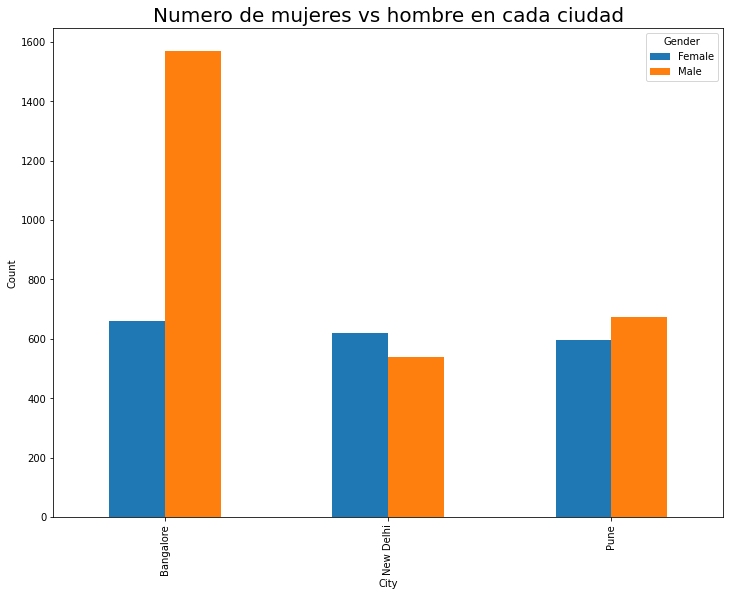

In [50]:
plt.rcParams['figure.figsize'] = (12, 9)
pd.crosstab(data['City'],data['Gender']).plot.bar()
plt.title('Numero de mujeres vs hombre en cada ciudad', fontsize = 20)
plt.ylabel('Count')
plt.show()